In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
alg_label = ["Traditional join", "Gradual LOUDS Backtracking", "Gradual LOUDS Optimal Order", 
                "Gradual DFUDS Backtracking", "Gradual DFUDS Optimal Order",
                "Ranked LOUDS Backtracking", "Ranked LOUDS Optimal Order",
                "Ranked DFUDS Backtracking", "Ranked DFUDS Optimal Order"]
queries_label = ["j3"]#,"j4","p2","p3","p4","s1","s2","s3","s4","t2","t3","t4","ti2","ti3","ti4","tr1","tr2"]

In [20]:
# box plots for each query
# TODO: make file j3... variable
# TDO hacer un for para cada query y función y tamaño k
data = [[],[]]
for i,type_fun in enumerate([0]):#,1]):
    file = f"results-f{type_fun}.csv"
    print(file)
    partialLoudsBack = pd.read_csv(f'../partial/louds/backtracking/{file}', delimiter=';')
    partialLoudsNon = pd.read_csv(f'../partial/louds/nonFixedQueue/{file}', delimiter=';')
    partialDfudsBack = pd.read_csv(f'../partial/dfuds/backtracking/{file}', delimiter=';')
    partialDfudsNon = pd.read_csv(f'../partial/dfuds/nonFixedQueue/{file}', delimiter=';')

    rankedLoudsBack = pd.read_csv(f'../partial/louds/backtracking/{file}', delimiter=';')
    rankedLoudsNon = pd.read_csv(f'../partial/louds/nonFixedQueue/{file}', delimiter=';')
    rankedDfudsBack = pd.read_csv(f'../partial/dfuds/backtracking/{file}', delimiter=';')
    rankedDfudsNon = pd.read_csv(f'../partial/dfuds/nonFixedQueue/{file}', delimiter=';')

    traditional = pd.read_csv(f'../all/results.csv',delimiter=';')

    print(i)
    data[i] = [partialLoudsBack, partialLoudsNon, partialDfudsBack, partialDfudsNon, rankedLoudsBack, rankedLoudsNon, rankedDfudsBack, rankedDfudsNon]

results-f0.csv
0


In [44]:
partialLoudsBack

,k,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2
0,1,0.000018,0.000006,0.000009,0.000017,17.0869,0.000013,0.000013,0.000016,0.000006,0.000013,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
data[0][2]

,k,j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2
0,1,0.000013,0.000158,0.00001,0.000046,0.000026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
data[0][2]['j4']

0    0.000158
Name: j4, dtype: float64

In [82]:
variables = data[0][1].columns[1:]  # Excluir la columna 'k'
variables

Index(['j3', 'j4', 'p2', 'p3', 'p4', 's1', 's2', 's3', 's4', 't2', 't3', 't4',
       'ti2', 'ti3', 'ti4', 'tr1', 'tr2'],
      dtype='object')

In [75]:
colors = ['limegreen', 'mediumturquoise', 'yellow', 'coral', 'hotpink','royalblue','darkorange', 'greenyellow', 'darkviolet']

TypeError: 'value' must be an instance of str or bytes, not a float

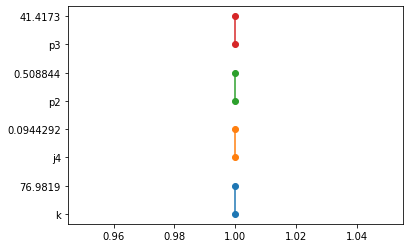

In [83]:
fig, j3 = plt.subplots(1,1)
# plot type_fun = 0
type_fun=0
#for i,variable in enumerate(variables):
#    print(variable)
#    print(i)
#    plt.plot(data[type_fun][0]['k'], data[type_fun][i][variable], marker='o')
 
#for i,query in enumerate(data[0]):
i = 1
for variable in variables:
    plt.plot(data[0][1]['k'], data[0][1][variable], marker='o', label=f'{variable}')

variables2 = data[0][2].columns[1:] 
for variable in variables2:
    plt.plot(data[0][2]['k'], data[0][2][variable], marker='o', label=f'{variable}')

    #for variable in variables:
#    plt.plot(data[0][2]['k'], data[0][i][variable], marker='o')

plt.xscale('log')  # Escala logarítmica en el eje x
plt.yscale('log')
plt.xlabel('k results')
plt.ylabel('Time (ms)')
plt.title('Gradual retrieval (DFUDS - backtracking)')
plt.legend()
plt.grid(True)

plt.show()
 